# 1번
Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B.\
They have tumor count data for 10 mice in strain A and 13 mice in strain B.\
Type A mice have been well studied, and information from other laboratories suggests that type A mice have tumor counts that are approximately Poisson-distributed with a mean of

1 Tumor count rates for type B mice are unknown, but type B mice are related to type A mice. The observed tumor counts for the two populations are\
yA = (12, 9, 12, 14, 13, 13, 15, 8, 15, 6);\
yB = (11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7).

#### $ \theta_A \sim gamma(120,10), \theta_B \sim gamma(12,1), p(\theta_A, \theta_B) = p(\theta_A)\times p(\theta_B) $

# 1-(a)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st
from scipy.stats import gamma
from scipy.stats import nbinom

In [7]:
syA = sum([12,9,12,14,13,13,15,8,15,6])
nA = 10

syB = sum([11,11,10,9,9,8,7,10,6,8,8,9,7])
nB = 13

In [8]:
# prior parameters for theta ~ gamma(a,1/b)
aA = 120
bA = 10
priorA = st.gamma(aA, scale= 1/bA)

aB = 12
bB = 1
priorB = st.gamma(aB, scale= 1/bB)

In [9]:
# posterior ~ gamma(a+sy,1/(b+n))
posteriorA = st.gamma(aA+syA, 1/(bA+nA))

posteriorB = st.gamma(aB+syB, 1/(bB+nB))

#### group  A posterior

In [10]:
# posterior mean (Group A)
(aA+syA)/(bA+nA)

11.85

In [11]:
# posterior variance (Group A)
(aA+syA)/((bA+nA)**2)

0.5925

In [12]:
# posterior 95% CI (Group A)
# upper and lower bounds
lbA = gamma.ppf(0.025, aA+syA, scale=1/(bA+nA))
ubA = gamma.ppf(0.975, aA+syA, scale=1/(bA+nA))
(lbA, ubA)


(10.389238190941795, 13.405448325642006)

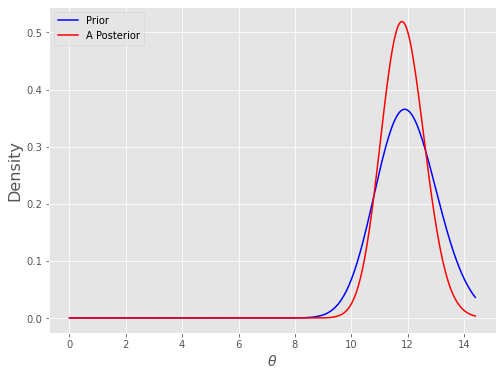

In [19]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorA.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
# plt.plot(thetas, likelihood(thetas, nA, syA), label='A Likelihood', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### group B posterior

In [13]:
# posterior mean (Group B)
(aB+syB)/(bB+nB)

8.928571428571429

In [14]:
# posterior variance (Group B)
(aB+syB)/((bB+nB)**2)

0.6377551020408163

In [15]:
# posterior 95% CI (Group B)
# upper and lower bounds
lbB = gamma.ppf(0.025, aB+syB, scale=1/(bB+nB))
ubB = gamma.ppf(0.975, aB+syB, scale=1/(bB+nB))
(lbB, ubB)

(7.432064219464302, 10.560308149242363)

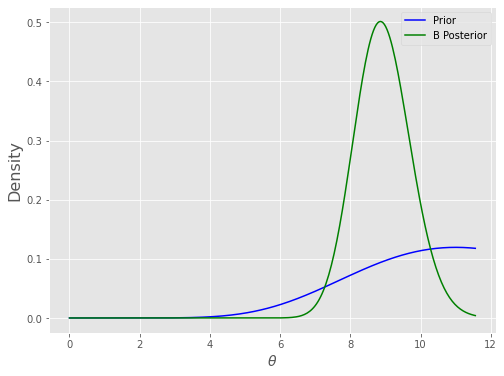

In [20]:
thetas = np.linspace(0.001, ubB+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorB.pdf(thetas), label='Prior', c='blue')
# 시각화를 위해 likelihood 함수에 임의의 상수를 곱함.
# plt.plot(thetas, (10**17)*likelihood(thetas, nB, syB), label='B Likelihood', c='orange')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', color='green')

plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Comparing Two Posterior Distributions

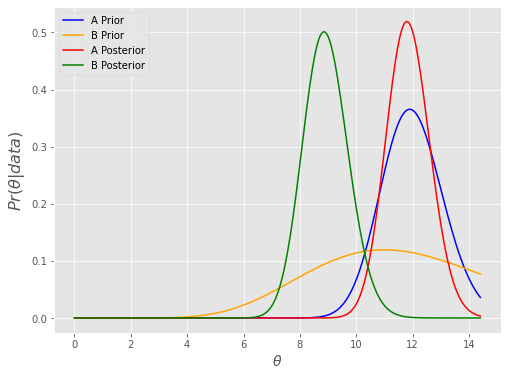

In [21]:
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, priorA.pdf(thetas), label='A Prior', c='blue')
plt.plot(thetas, priorB.pdf(thetas), label='B Prior', c='orange')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();


#### Posterior Predictive Distributions

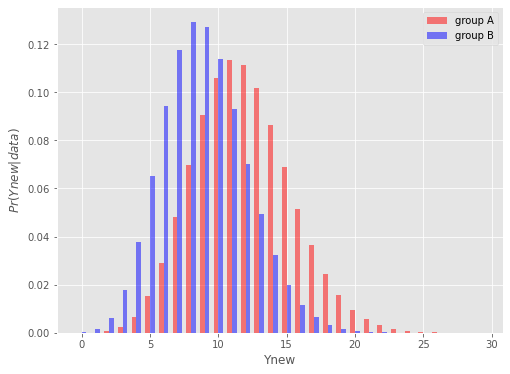

In [22]:
ynew = np.arange(30)
postpredA = st.nbinom.pmf(ynew, aA+syA, (bA+nA)/(bA+nA+1))
postpredB = st.nbinom.pmf(ynew, aB+syB, (bB+nB)/(bB+nB+1))
width = 0.35  # the width of the bars
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
plt.bar(ynew - width/2, postpredA, width, label='group A', color='red', alpha=0.5)
plt.bar(ynew + width/2, postpredB, width, label='group B', color='blue', alpha=0.5)
plt.xlabel('Ynew')
plt.ylabel(r'$Pr(Ynew|data)$')
plt.legend()
plt.show()

# 1-(b)

In [16]:
mean = [0]
mean = mean*50
for i in range(50):
    mean[i] = (12*(i+1)+syB)/(i+1+nB)

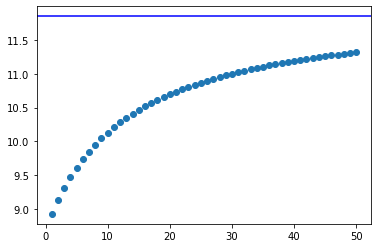

In [17]:
plt.scatter(range(1,51),mean)
plt.axhline(y=(aA+syA)/(bA+nA), color = 'blue')

# 1-(c)

### B가 A와 관계가 있다는 사전지식을 prior에 줬다고 해서 A가 B의 모집단에 대해 뭔가를 알려주지는 않기 때문에 여전히 독립이다.

# 2

In [23]:
from IPython.display import Image

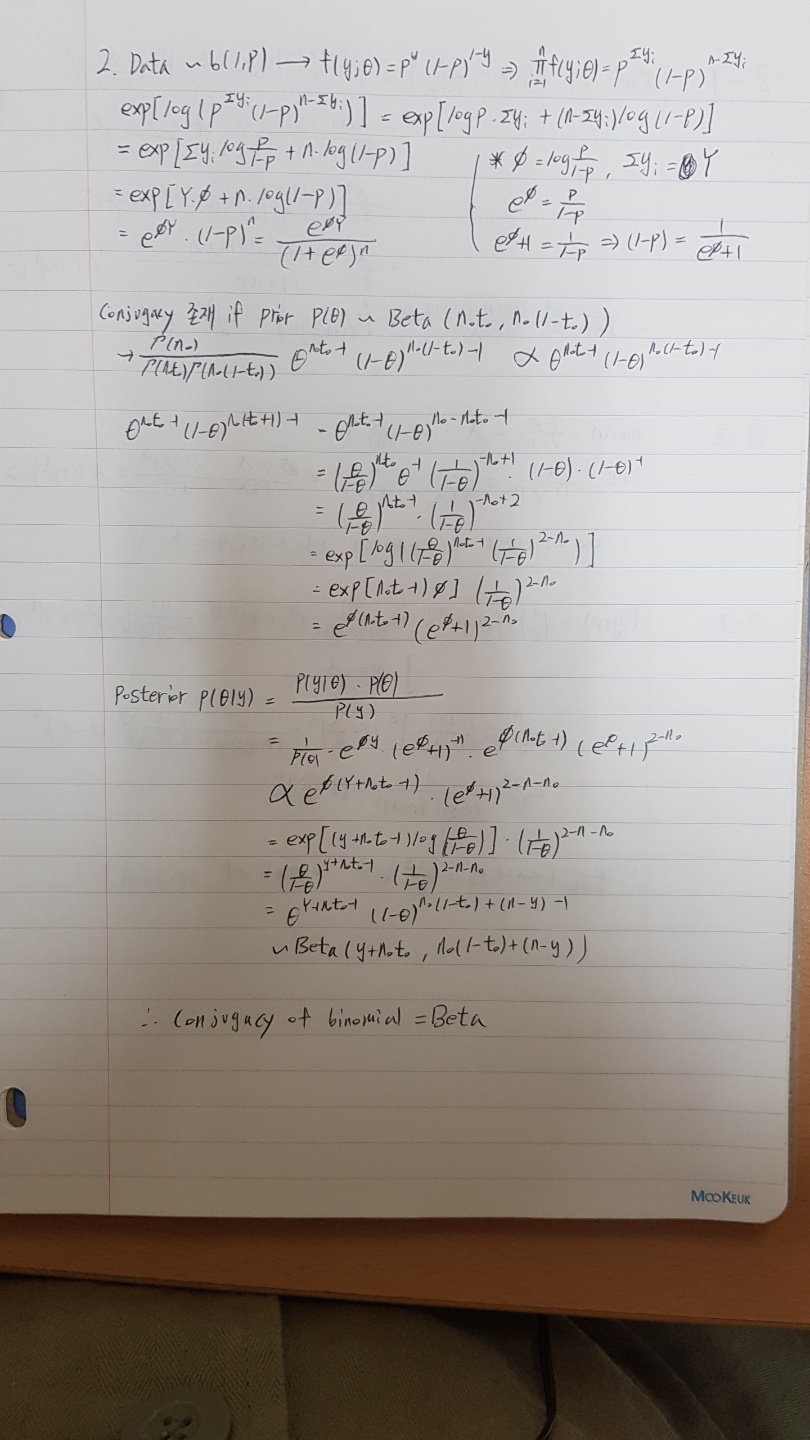

In [25]:
Image("C:/Users/rkdxo/Desktop/햑교/2021-1/ESC/week2/KakaoTalk_20210317_140505240_01.jpg")

# 3

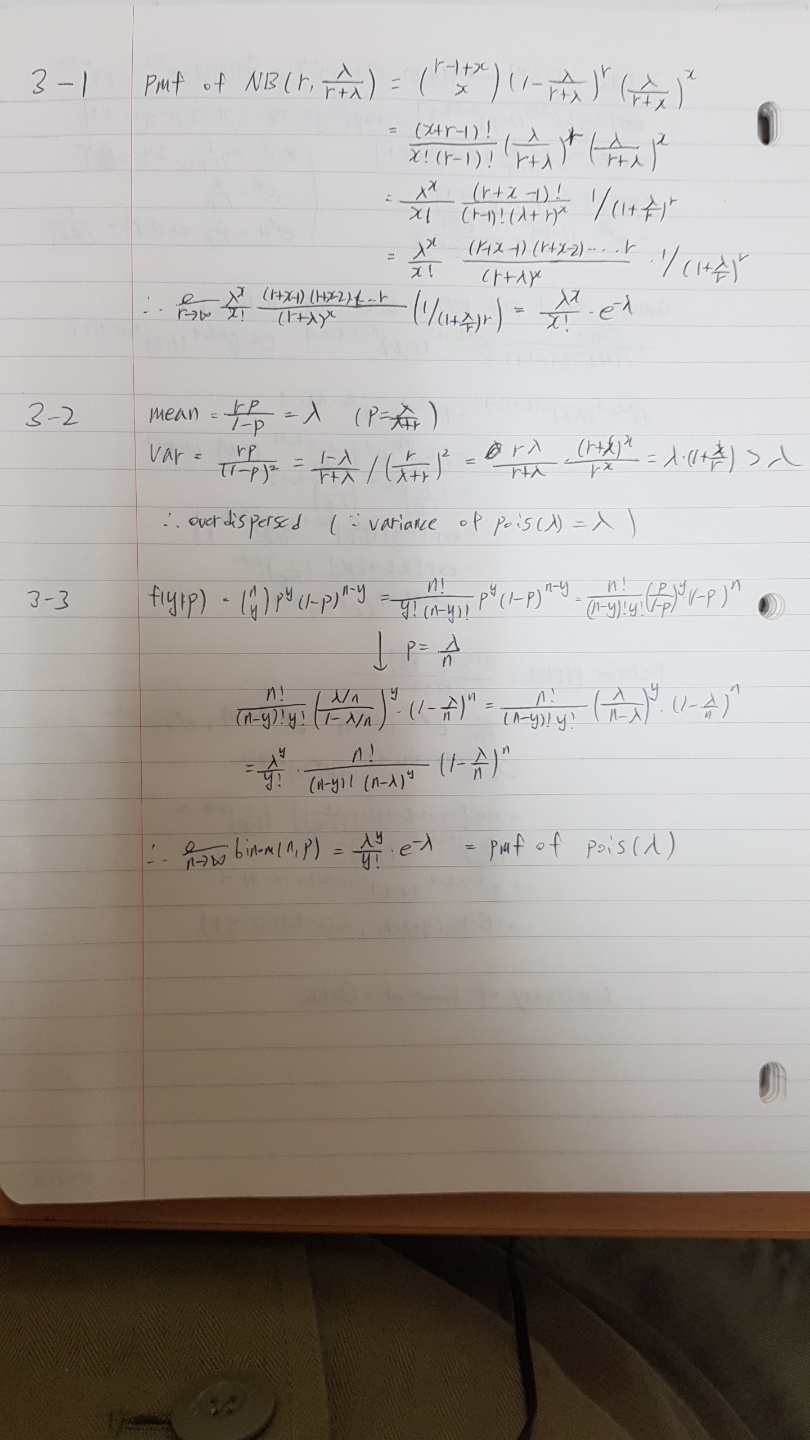

In [24]:
Image("C:/Users/rkdxo/Desktop/햑교/2021-1/ESC/week2/KakaoTalk_20210317_140505240.jpg")